In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec
import uproot
import math
from glob import glob
%matplotlib inline

%load_ext autoreload
%autoreload 2

prop_cycle = plt.rcParams['axes.prop_cycle']
_colors = prop_cycle.by_key()['color']

# _save_dir = 'plots/sbnd/'
# _base_dir = '../data_file_sbnd/'
# _daq_path = '/Users/mdeltutt/Work/SBND/Purity Monitors/communication/gui/sbndprmdaq/'

# max_pts = 8000


In [2]:
file = 'MIPPFieldMapForG4Beamline.txt'

In [3]:
df = pd.read_csv(file, sep=' ', header=4, index_col=False,
                 names=['x', 'y', 'z', 'Bx', 'By', 'Bz'])

In [4]:
df.head()

,x,y,z,Bx,By,Bz
0,-635.0,-279.4,-1016.0,-0.00734,0.00277,-0.00632
1,-609.6,-279.4,-1016.0,-0.00833,0.00279,-0.00686
2,-584.2,-279.4,-1016.0,-0.00932,0.00280,-0.00741
3,-558.8,-279.4,-1016.0,-0.01075,0.00271,-0.00803
4,-533.4,-279.4,-1016.0,-0.01225,0.00260,-0.00866


In [5]:
# grid X0=-635 Y0=-279.4 Z0=-1016 nX=51 nY=23 nZ=101 dX=25.40 dY=25.40 dZ=25.40 tolerance=0.0001

In [6]:
# for i in range(101):
#     print(-1016+i*25.4)

In [7]:
b = np.sqrt(df['Bx'] **2 + df['By'] **2 + df['Bz'] **2)
df['B'] = b

In [11]:
scale = 50.8/2

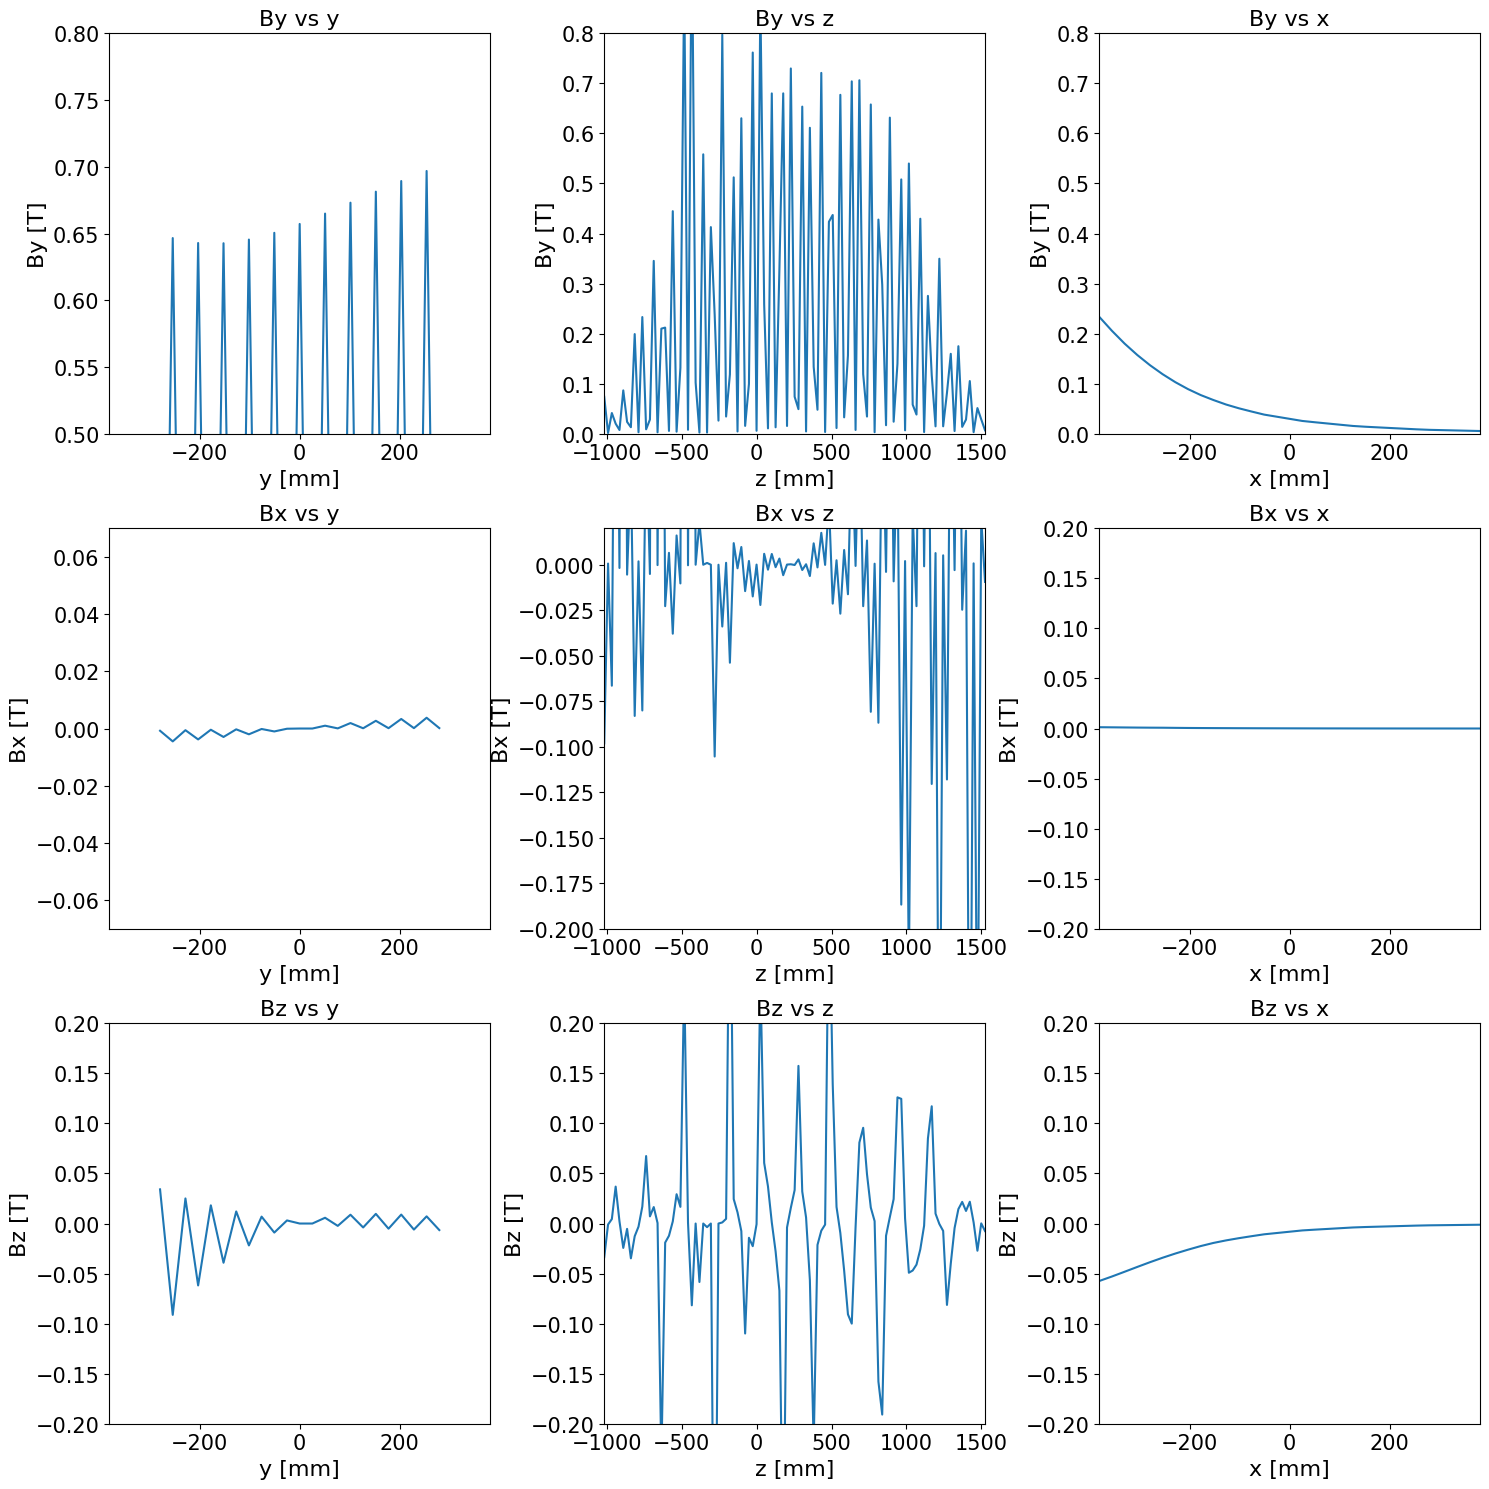

In [12]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(15, 15))

font_size = 16

df_sel = df.query('x == 5*@scale and z == 8*@scale')
ax[0][0].plot(df_sel['y'], df_sel['By'])
ax[0][0].set_xlim([-15*scale,15*scale])
ax[0][0].set_ylim([0.5,0.8])
ax[0][0].set_title('By vs y',fontsize=font_size)
ax[0][0].set_xlabel('y [mm]',fontsize=font_size)
ax[0][0].set_ylabel('By [T]',fontsize=font_size)

df_sel = df.query('x == 5*@scale and y == 5*@scale')
ax[0][1].plot(df_sel['z'], df_sel['By'])
ax[0][1].set_xlim([-40*scale,60*scale])
ax[0][1].set_ylim([0.,0.8])
ax[0][1].set_title('By vs z',fontsize=font_size)
ax[0][1].set_xlabel('z [mm]',fontsize=font_size)
ax[0][1].set_ylabel('By [T]',fontsize=font_size)

df_sel = df.query('z == 8*@scale and y == 5*@scale')
ax[0][2].plot(df_sel['x'], df_sel['By'])
ax[0][2].set_xlim([-15*scale,15*scale])
ax[0][2].set_ylim([0.,0.8])
ax[0][2].set_title('By vs x',fontsize=font_size)
ax[0][2].set_xlabel('x [mm]',fontsize=font_size)
ax[0][2].set_ylabel('By [T]',fontsize=font_size)

df_sel = df.query('x == 5*@scale and z == 8*@scale')
ax[1][0].plot(df_sel['y'], df_sel['Bx'])
ax[1][0].set_xlim([-15*scale,15*scale])
ax[1][0].set_ylim([-0.07,0.07])
ax[1][0].set_title('Bx vs y',fontsize=font_size)
ax[1][0].set_xlabel('y [mm]',fontsize=font_size)
ax[1][0].set_ylabel('Bx [T]',fontsize=font_size)

df_sel = df.query('x == 5*@scale and y == 5*@scale')
ax[1][1].plot(df_sel['z'], df_sel['Bx'])
ax[1][1].set_xlim([-40*scale,60*scale])
ax[1][1].set_ylim([-0.2,0.02])
ax[1][1].set_title('Bx vs z',fontsize=font_size)
ax[1][1].set_xlabel('z [mm]',fontsize=font_size)
ax[1][1].set_ylabel('Bx [T]',fontsize=font_size)

df_sel = df.query('z == 8*@scale and y == 5*@scale')
ax[1][2].plot(df_sel['x'], df_sel['Bx'])
ax[1][2].set_xlim([-15*scale,15*scale])
ax[1][2].set_ylim([-0.2,0.2])
ax[1][2].set_title('Bx vs x',fontsize=font_size)
ax[1][2].set_xlabel('x [mm]',fontsize=font_size)
ax[1][2].set_ylabel('Bx [T]',fontsize=font_size)

df_sel = df.query('x == 5*@scale and z == 8*@scale')
ax[2][0].plot(df_sel['y'], df_sel['Bz'])
ax[2][0].set_xlim([-15*scale,15*scale])
ax[2][0].set_ylim([-0.2,0.2])
ax[2][0].set_title('Bz vs y',fontsize=font_size)
ax[2][0].set_xlabel('y [mm]',fontsize=font_size)
ax[2][0].set_ylabel('Bz [T]',fontsize=font_size)

df_sel = df.query('x == 5*@scale and y == 5*@scale')
ax[2][1].plot(df_sel['z'], df_sel['Bz'])
ax[2][1].set_xlim([-40*scale,60*scale])
ax[2][1].set_ylim([-0.2,0.2])
ax[2][1].set_title('Bz vs z',fontsize=font_size)
ax[2][1].set_xlabel('z [mm]',fontsize=font_size)
ax[2][1].set_ylabel('Bz [T]',fontsize=font_size)

df_sel = df.query('z == 8*@scale and y == 5*@scale')
ax[2][2].plot(df_sel['x'], df_sel['Bz'])
ax[2][2].set_xlim([-15*scale,15*scale])
ax[2][2].set_ylim([-0.2,0.2])
ax[2][2].set_title('Bz vs x',fontsize=font_size)
ax[2][2].set_xlabel('x [mm]',fontsize=font_size)
ax[2][2].set_ylabel('Bz [T]',fontsize=font_size)

for axes in ax:
    for a in axes:
        a.tick_params(labelsize=15)
plt.tight_layout()
# plt.savefig(_save_dir + 'fieldmap_1d.pdf')
plt.show()


In [41]:
bins_x = np.linspace(start=-635, stop=660.4, num=51)
bins_y = np.linspace(start=-279.4, stop=304.8, num=23)

In [48]:
bins_x

array([-635.   , -609.092, -583.184, -557.276, -531.368, -505.46 ,
       -479.552, -453.644, -427.736, -401.828, -375.92 , -350.012,
       -324.104, -298.196, -272.288, -246.38 , -220.472, -194.564,
       -168.656, -142.748, -116.84 ,  -90.932,  -65.024,  -39.116,
        -13.208,   12.7  ,   38.608,   64.516,   90.424,  116.332,
        142.24 ,  168.148,  194.056,  219.964,  245.872,  271.78 ,
        297.688,  323.596,  349.504,  375.412,  401.32 ,  427.228,
        453.136,  479.044,  504.952,  530.86 ,  556.768,  582.676,
        608.584,  634.492,  660.4  ])

1173


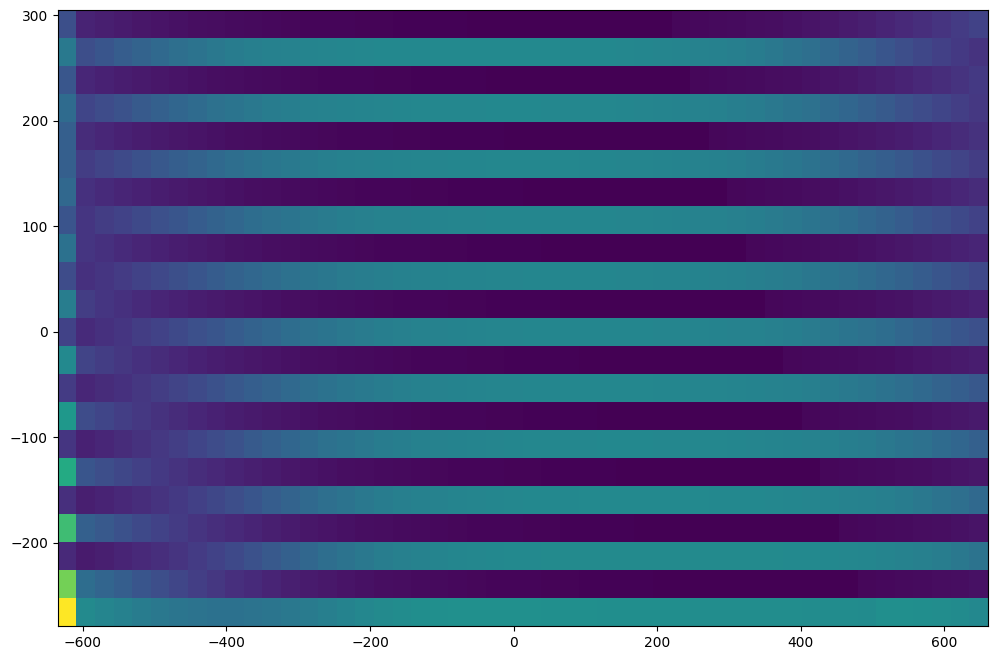

In [51]:
df_sel = df.query('z == 0')

x = df_sel['x'].values
y = df_sel['y'].values
w = df_sel['B'].values

print(len(x))

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 8))
ax.hist2d(x, y, weights=w, bins=[bins_x, bins_y])

plt.show()

In [33]:
len(df)

b_arr = []

for i in range(23):
    y = -279.4 + 25.4 * i
    y = round(y, 1)
    df_sel = df.query('y == @y and z==0')
    # print(len(df_sel))
    b = np.sqrt(df_sel['Bx'] **2 + df_sel['By'] **2 + df_sel['Bz'] **2)
    b_arr.append(b.values.tolist())
    # print(type(b))

b = np.array(b_arr)
type(b)
b.shape

(23, 51)

In [13]:
bx = df['Bx'].values
by = df['Bx'].values

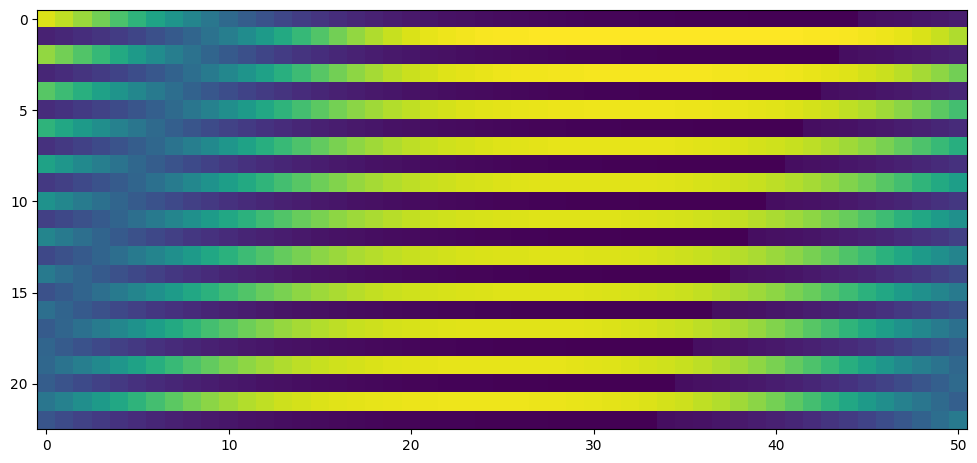

In [35]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 8), sharex=True)
ax.imshow(b)